This example demonstrates the asymmetric coupling at different resolutions. One would expect the coupling to the same waveguide to be identical in both directions, but that is not the case at lower resolutions. This shouldn't be a huge problem since our final device will only have waveguides in the (+) directions

In [1]:
import meep as mp
import numpy as np
from matplotlib import pyplot as plt

res_arr = [20,40,60,80,100,120,140]
res = res_arr[0]
fcen = 1/0.93
df = fcen**2*0.01
nfreq = 50
fcen_index = nfreq//2 - 1

GaAs = mp.Medium(index=3.45)
Sx, Sy = 4, 4

# waveguide dimensions
wg_w = 0.30
wg_l = mp.inf

pml_layers = [mp.PML(1.0)]
cell = mp.Vector3(Sx, Sy)

Using MPI version 3.1, 1 processes


In [2]:

geometry = [mp.Block(material=mp.air, center=mp.Vector3(0,0,0), size=mp.Vector3(Sx, Sy, 0)), 
            mp.Block(material=GaAs, center=mp.Vector3(0,0,0), size=mp.Vector3(wg_l, wg_w, 0))]
                     
source = [mp.Source(mp.GaussianSource(frequency=fcen, fwidth=df),
                    component = mp.Ey,
                    center = mp.Vector3(0,0,0),
                    size = mp.Vector3(0,0,0))]                   
sim = mp.Simulation(cell_size = cell,
                    geometry = geometry,
                    boundary_layers = pml_layers,
                    sources = source,
                    resolution = res)

In [3]:
# setup the monitors
xp_mon = mp.FluxRegion(center=mp.Vector3(0.6,0,0), size=mp.Vector3(0, 2*wg_w, 0))
xm_mon = mp.FluxRegion(center=mp.Vector3(-0.6,0,0), size=mp.Vector3(0, 2*wg_w, 0))

yp_mon = mp.FluxRegion(center=mp.Vector3(0,wg_w,0), size=mp.Vector3(4*wg_w, 0,0))
ym_mon = mp.FluxRegion(center=mp.Vector3(0,-wg_w,0), size=mp.Vector3(4*wg_w, 0, 0))

xp_flux = sim.add_flux(fcen, df, nfreq, xp_mon)
xm_flux = sim.add_flux(fcen, df, nfreq, xm_mon)
yp_flux = sim.add_flux(fcen, df, nfreq, yp_mon)
ym_flux = sim.add_flux(fcen, df, nfreq, ym_mon)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000205994 s
Working in 2D dimensions.
Computational cell is 4 x 4 x 0 with resolution 20
     block, center = (0,0,0)
          size (4,4,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,0.3,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
time for set_epsilon = 0.0143189 s
-----------


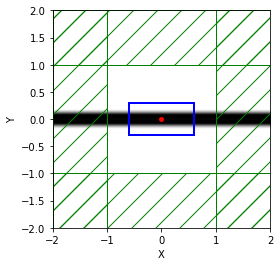

In [4]:
sim.plot2D(plot_boundaries_flag=True, plot_monitors_flag=True, plot_sources_flag=True)
plt.show()

In [5]:
pt = mp.Vector3(0.6, 0, 0)
sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, pt, 1e-3))

field decay(t = 50.025000000000006): 1.998783521297459e-09 / 1.998783521297459e-09 = 1.0
field decay(t = 100.05000000000001): 2.496822504794971e-07 / 2.496822504794971e-07 = 1.0
field decay(t = 150.07500000000002): 1.5729581034546273e-05 / 1.5729581034546273e-05 = 1.0
field decay(t = 200.10000000000002): 0.0005165270015634136 / 0.0005165270015634136 = 1.0
field decay(t = 250.125): 0.008476736295082315 / 0.008476736295082315 = 1.0
field decay(t = 300.15000000000003): 0.07269391433961199 / 0.07269391433961199 = 1.0
field decay(t = 350.175): 0.3156536182826204 / 0.3156536182826204 = 1.0
field decay(t = 400.20000000000005): 0.7068737039667834 / 0.7068737039667834 = 1.0
field decay(t = 450.225): 0.8359747145387291 / 0.8359747145387291 = 1.0
field decay(t = 500.25): 0.8094451161714649 / 0.8359747145387291 = 0.968265070813891
field decay(t = 550.275): 0.4719631352324149 / 0.8359747145387291 = 0.5645662805636806
field decay(t = 600.3000000000001): 0.14041229233593958 / 0.8359747145387291 = 0.1

In [6]:
P_xp = np.array(mp.get_fluxes(xp_flux))
P_xm = np.array(mp.get_fluxes(xm_flux))
P_yp = np.array(mp.get_fluxes(yp_flux))
P_ym = np.array(mp.get_fluxes(ym_flux))
P_total = (P_xp-P_xm)+(P_yp-P_ym)

xp_eig = sim.get_eigenmode_coefficients(xp_flux, [1], eig_parity=mp.NO_PARITY)
xm_eig = sim.get_eigenmode_coefficients(xm_flux, [1], eig_parity=mp.NO_PARITY)

xp_alpha = np.array(xp_eig.alpha)
xm_alpha = np.array(xm_eig.alpha)

xp_modal_power = abs(xp_alpha)**2
xm_modal_power = abs(xm_alpha)**2

MPB solved for frequency_1(3.68973,0,0) = 1.16128 after 24 iters
MPB solved for frequency_1(3.36096,0,0) = 1.06957 after 7 iters
MPB solved for frequency_1(3.36067,0,0) = 1.06949 after 4 iters
MPB solved for frequency_1(3.36067,0,0) = 1.06949 after 1 iters
Dominant planewave for band 1: (3.360673,-0.000000,0.000000)
MPB solved for frequency_1(3.36152,0,0) = 1.06972 after 22 iters
MPB solved for frequency_1(3.36152,0,0) = 1.06972 after 1 iters
Dominant planewave for band 1: (3.361520,-0.000000,0.000000)
MPB solved for frequency_1(3.36237,0,0) = 1.06996 after 22 iters
MPB solved for frequency_1(3.36237,0,0) = 1.06996 after 1 iters
Dominant planewave for band 1: (3.362367,-0.000000,0.000000)
MPB solved for frequency_1(3.36321,0,0) = 1.0702 after 22 iters
MPB solved for frequency_1(3.36321,0,0) = 1.0702 after 1 iters
Dominant planewave for band 1: (3.363213,-0.000000,0.000000)
MPB solved for frequency_1(3.36406,0,0) = 1.07043 after 22 iters
MPB solved for frequency_1(3.36406,0,0) = 1.07043

Dominant planewave for band 1: (3.396225,-0.000000,0.000000)
MPB solved for frequency_1(3.39707,0,0) = 1.07963 after 23 iters
MPB solved for frequency_1(3.39707,0,0) = 1.07963 after 1 iters
Dominant planewave for band 1: (3.397072,-0.000000,0.000000)
MPB solved for frequency_1(3.39792,0,0) = 1.07987 after 23 iters
MPB solved for frequency_1(3.39792,0,0) = 1.07987 after 1 iters
Dominant planewave for band 1: (3.397918,-0.000000,0.000000)
MPB solved for frequency_1(3.39876,0,0) = 1.08011 after 23 iters
MPB solved for frequency_1(3.39876,0,0) = 1.08011 after 1 iters
Dominant planewave for band 1: (3.398764,-0.000000,0.000000)
MPB solved for frequency_1(3.39961,0,0) = 1.08034 after 23 iters
MPB solved for frequency_1(3.39961,0,0) = 1.08034 after 1 iters
Dominant planewave for band 1: (3.399611,-0.000000,0.000000)
MPB solved for frequency_1(3.40046,0,0) = 1.08058 after 23 iters
MPB solved for frequency_1(3.40046,0,0) = 1.08058 after 1 iters
Dominant planewave for band 1: (3.400457,-0.000000

MPB solved for frequency_1(3.3903,0,0) = 1.07775 after 1 iters
Dominant planewave for band 1: (3.390300,-0.000000,0.000000)
MPB solved for frequency_1(3.39115,0,0) = 1.07798 after 23 iters
MPB solved for frequency_1(3.39115,0,0) = 1.07798 after 1 iters
Dominant planewave for band 1: (3.391147,-0.000000,0.000000)
MPB solved for frequency_1(3.39199,0,0) = 1.07822 after 23 iters
MPB solved for frequency_1(3.39199,0,0) = 1.07822 after 1 iters
Dominant planewave for band 1: (3.391993,-0.000000,0.000000)
MPB solved for frequency_1(3.39284,0,0) = 1.07845 after 23 iters
MPB solved for frequency_1(3.39284,0,0) = 1.07845 after 1 iters
Dominant planewave for band 1: (3.392840,-0.000000,0.000000)
MPB solved for frequency_1(3.39369,0,0) = 1.07869 after 23 iters
MPB solved for frequency_1(3.39369,0,0) = 1.07869 after 1 iters
Dominant planewave for band 1: (3.393686,-0.000000,0.000000)
MPB solved for frequency_1(3.39453,0,0) = 1.07893 after 23 iters
MPB solved for frequency_1(3.39453,0,0) = 1.07893 a

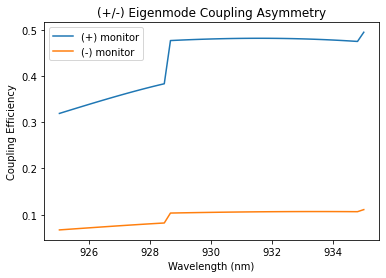

In [7]:
# plotting coupling efficiency (modal powers normalized with total output flux)
wavl = 1/np.array(mp.get_flux_freqs(xp_flux))*1000

# [-,-,-] last arg is the direction, 0=forward, 1=backward
plt.plot(wavl, xp_modal_power[0,:,0]/P_total,
         wavl, xm_modal_power[0,:,1]/P_total)
plt.title('(+/-) Eigenmode Coupling Asymmetry')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Coupling Efficiency')
plt.legend(['(+) monitor', '(-) monitor'])
plt.show()

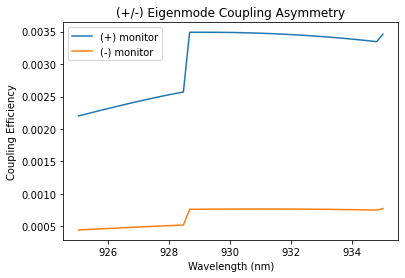

In [8]:
# plotting coupling % for (+) monitor using backward direction and for (-) monitor using forward direction:
plt.plot(wavl, xp_modal_power[0,:,1]/P_total,
         wavl, xm_modal_power[0,:,0]/P_total)
plt.title('(+/-) Eigenmode Coupling Asymmetry')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Coupling Efficiency')
plt.legend(['(+) monitor', '(-) monitor'])
plt.show()

In [86]:
# DO NOT RERUN THIS BOX (need to accumulate coupling % at each resolution)
xp_coupling = []
xm_coupling = []

In [147]:
# plot coupling efficiencies vs resolution
xp_coupling.append(xp_modal_power[0, fcen_index, 0]/P_total[fcen_index])
xm_coupling.append(xm_modal_power[0, fcen_index, 1]/P_total[fcen_index])

In [148]:
print(xp_coupling)
print(xm_coupling)
print(res_arr)

[0.48036103184949885, 0.2921916386251616, 0.46162025818588753, 0.45923555395397864, 0.04601128066157555, 0.3579089873079221, 0.28293853888336135]
[0.10505351174499476, 0.21567139773181698, 0.4054036928889704, 0.4272005201850482, 0.04395459435858124, 0.3466523186372789, 0.27632000411404445]
[20, 40, 60, 80, 100, 120, 140]


In [139]:
sim.reset_meep()

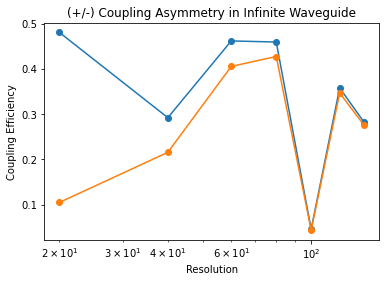

In [162]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(res_arr, xp_coupling, '-o',
         res_arr, xm_coupling, '-o')
plt.xlabel('Resolution')
plt.ylabel('Coupling Efficiency')
plt.title('(+/-) Coupling Asymmetry in Infinite Waveguide')
ax.set_xscale('log')
ax.set_yscale('linear')
plt.show()

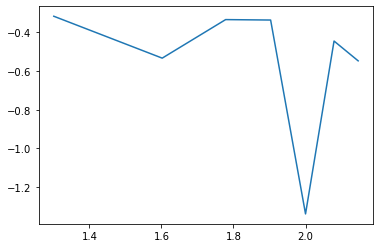

In [150]:
plt.plot(np.log10(res_arr), np.log10(xp_coupling))
plt.show()